In [1]:
import numpy as np

In [2]:
dia_hebra = 0.27 # mm
# 
F_hebra = 3.5 # 3.241 # kg
F_hebra_sin_corr = 3.241 # kg
F_hebra_kg = F_hebra
F_hebra = 9.81*F_hebra # N
A_hebra = np.pi*(dia_hebra/2)**2
sigma_hebra = F_hebra/A_hebra # MPa

F_trenzado = 142 # kg
F_trenzado_con_alma = 177 # kg
F_trenzado_kg = F_trenzado
F_trenzado = 9.81*F_trenzado # N
dia_trenzado = 4 # mm

# 4 monofilamentos x 16 + 15 monofilamentos en alma
theta = 85 # grados
ctheta = np.sin(np.deg2rad(theta))
Nalma = 15
Atrenzado = (ctheta*16*4 + Nalma)*np.pi*(dia_hebra/2)**2 
sigma_trenzado = F_trenzado/Atrenzado # MPa

# homogenized 
Atrenzado_homogenized = np.pi*(dia_trenzado/2)**2
sigma_trenzado_homogenized = F_trenzado/Atrenzado_homogenized # MPa
# print with 2 decimals
print(f"sigma_trenzado = {sigma_trenzado:.2f} MPa")
print(f"sigma_hebra = {sigma_hebra:.2f} MPa")
print(f"sigma_trenzado_homogenized = {sigma_trenzado_homogenized:.2f} MPa")
# 
# ratio 
ratio = sigma_trenzado/sigma_hebra
print(f"ratio = {ratio:.3f}")

sigma_trenzado = 308.93 MPa
sigma_hebra = 599.68 MPa
sigma_trenzado_homogenized = 110.85 MPa
ratio = 0.515


In [3]:
from tools.step.runstep import runstep,address,lj
import os


In [4]:
import glob

In [5]:
files = glob.glob('output/*.json')

In [6]:
file = files[-4]

In [7]:
results = []
for file in files:

    try:
        id_sim = os.path.basename(file).replace('.json','')

        params_sim = lj(id_sim)
        params = lj(params_sim["dependencies"]["post_path"])

        steps = params["results"]["frd"]["steps"]
        step_str =  [ i[:7 ] for i in steps ]
        step_str = np.array(step_str)    
        step_str_uq = np.unique(step_str)

        indx = [ np.where(step_str == iuq )[-1][-1] for iuq in step_str_uq]


        sigma_max = [i["sigma_max"] for i in params["results"]["measurements"]]
        epsilon = [i["epsilon"] for i in params["results"]["measurements"]]
        Ftotal = [i["F_total"] for i in params["results"]["measurements"]]
        Ftrenzado = [i["Ftrenzado"] for i in params["results"]["measurements"]]
        Falma = [i["Falma"] for i in params["results"]["measurements"]]

        sigma_max = np.array(sigma_max)
        sigma_max = sigma_max[indx]

        epsilon = np.array(epsilon)
        epsilon = epsilon[indx]
        Ftotal = np.array(Ftotal)/9.81 # kg
        Ftotal = Ftotal[indx]

        Ftrenzado = np.array(Ftrenzado)/9.81 # kg
        Ftrenzado = Ftrenzado[indx]

        Falma = np.array(Falma)/9.81 # kg
        Falma = Falma[indx]

        step_str_uq = step_str[indx]

        angle = 85
        ctheta = np.sin(np.deg2rad(angle))

        results.append({"id_sim":id_sim,
                        "step_str_uq":step_str_uq,"sigma_max":sigma_max,
                        "Ftrenzado":Ftrenzado,
                        "Falma":Falma,
                        "epsilon":epsilon,
                        "Ftotal":Ftotal})

    except Exception as e:
        print(e)
        print(file)
        pass


Simulation not found
output\2024-08-30__08-55-14__69218.json
Simulation not found
output\2024-08-30__09-08-30__98506.json
'Ftrenzado'
output\2024-08-30__09-27-38__56150.json
'Ftrenzado'
output\2024-08-30__11-06-00__65026.json
'Ftrenzado'
output\2024-08-30__12-42-12__65026.json
'Ftrenzado'
output\2024-08-30__22-32-19__65026.json
Simulation not found
output\2024-08-31__08-23-50__65026.json
Simulation not found
output\2024-08-31__17-02-56__96293.json
Simulation not found
output\2024-09-01__15-54-14__96293.json
Simulation not found
output\2024-09-10__16-39-35__78128.json
Simulation not found
output\2024-09-10__16-54-15__59821.json
'Ftrenzado'
output\2024-09-10__18-46-17__53932.json
Simulation not found
output\2024-09-11__08-45-05__88798.json
Simulation not found
output\2024-09-11__09-27-37__96293.json
Simulation not found
output\2024-09-11__14-05-30__96293.json
'Ftrenzado'
output\2024-09-11__15-42-25__31477.json
Simulation not found
output\2024-09-11__17-11-50__65026.json
'Ftrenzado'
outpu

In [8]:
from matplotlib import pyplot as plt
import numpy as np

In [9]:
len(results)

13

In [10]:
results = results[-7:]

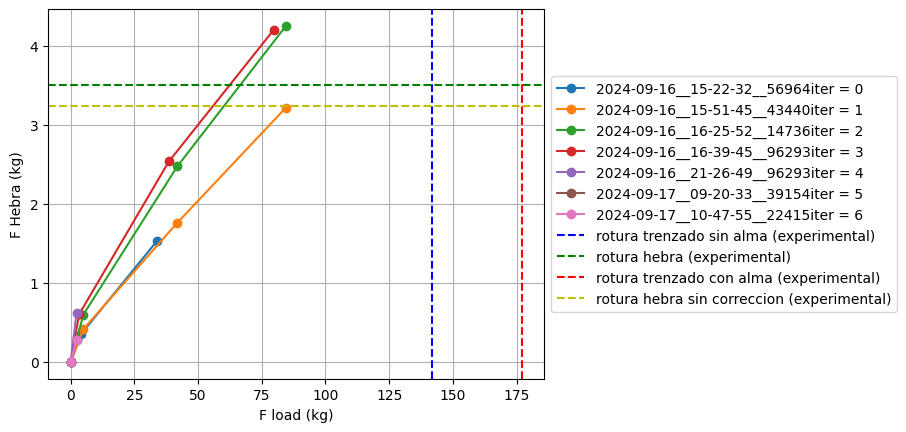

In [11]:
# linear regression
iter = -1
for r in results:
    iter += 1
    id_sim = r["id_sim"]
    step_str_uq = r["step_str_uq"]
    sigma_max = r["sigma_max"]
    epsilon = r["epsilon"]
    Ftotal = r["Ftotal"]

    Fmax =  sigma_max*A_hebra/9.81
    label = f"{id_sim}" + f"iter = {iter}"
    plt.plot(Ftotal,Fmax,label=label,marker="o")
plt.axvline(x=F_trenzado_kg, color='b', linestyle='--',label="rotura trenzado sin alma (experimental)")
plt.axhline(y=F_hebra_kg, color='g', linestyle='--',label="rotura hebra (experimental)")


plt.axvline(x=F_trenzado_con_alma, color='r', linestyle='--',label="rotura trenzado con alma (experimental)")
plt.axhline(y=F_hebra_sin_corr, color='y', linestyle='--',label="rotura hebra sin correccion (experimental)")

F_trenzado_con_alma = 142 # kg
#
plt.ylabel("F Hebra (kg)")
plt.xlabel("F load (kg)")
plt.grid()
# outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [12]:
F_trenzado_kg

142

In [13]:
F_trenzado_con_alma

142

In [14]:
Ftotal = results[-1]["Ftotal"][-1]
Ftrenzado = results[-1]["Ftrenzado"][-1]
Falma = results[-1]["Falma"][-1]

print(f"Ftotal = {Ftotal} kg")
print(f"Ftrenzado = {Ftrenzado} kg")
print(f"Falma = {Falma} kg")


Ftotal = 2.278522812792944 kg
Ftrenzado = 2.278522812792944 kg
Falma = 0.0 kg


In [15]:
Falmas = [i["Falma"][-1] for i in results]
Ftotals = [i["Ftotal"][-1] for i in results]
Fmaxs = [i["sigma_max"][-1]*A_hebra/9.81 for i in results]
ratio = [iFmax/iFtotal for iFmax,iFtotal in zip(Fmaxs,Ftotals)]
error = [ np.sqrt((iratio - F_hebra_kg/F_trenzado_kg)**2) for iratio in ratio]

In [16]:
F_trenzado_kg

142

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame({"Ftotal":Ftotals,"Falma":Falmas,"Fmax":Fmaxs,"error":error,"ratio":ratio})

In [19]:
# sort by error
df = df.sort_values(by="error")

In [20]:
df

,Ftotal,Falma,Fmax,error,ratio
1,84.483264,0.0,3.215772,0.013416,0.038064
0,33.715278,0.0,1.523699,0.020545,0.045193
2,84.483264,0.0,4.248976,0.025646,0.050294
3,79.693733,0.0,4.199766,0.028051,0.052699
6,2.278523,0.0,0.272576,0.094980,0.119628
5,2.278523,0.0,0.272576,0.094980,0.119628
4,2.278523,0.0,0.619461,0.247222,0.271870


In [21]:
# Ratio 
ratio = Ftrenzado/Falma	

print(f"ratio = {ratio:.3f}")

ratio = inf


C:\Users\djoroya\AppData\Local\Temp\ipykernel_11736\3485108412.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = Ftrenzado/Falma
